In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# Importing the data
df = pd.read_csv('E:\\download\\Fraud_check.csv')

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [7]:
#Creating dummy vairables 
df = pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [8]:
# Creating columns TaxInc and dividing 'Taxable.Income' column on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [9]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [10]:
# Creating dummy varaible 
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [11]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [12]:
df.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


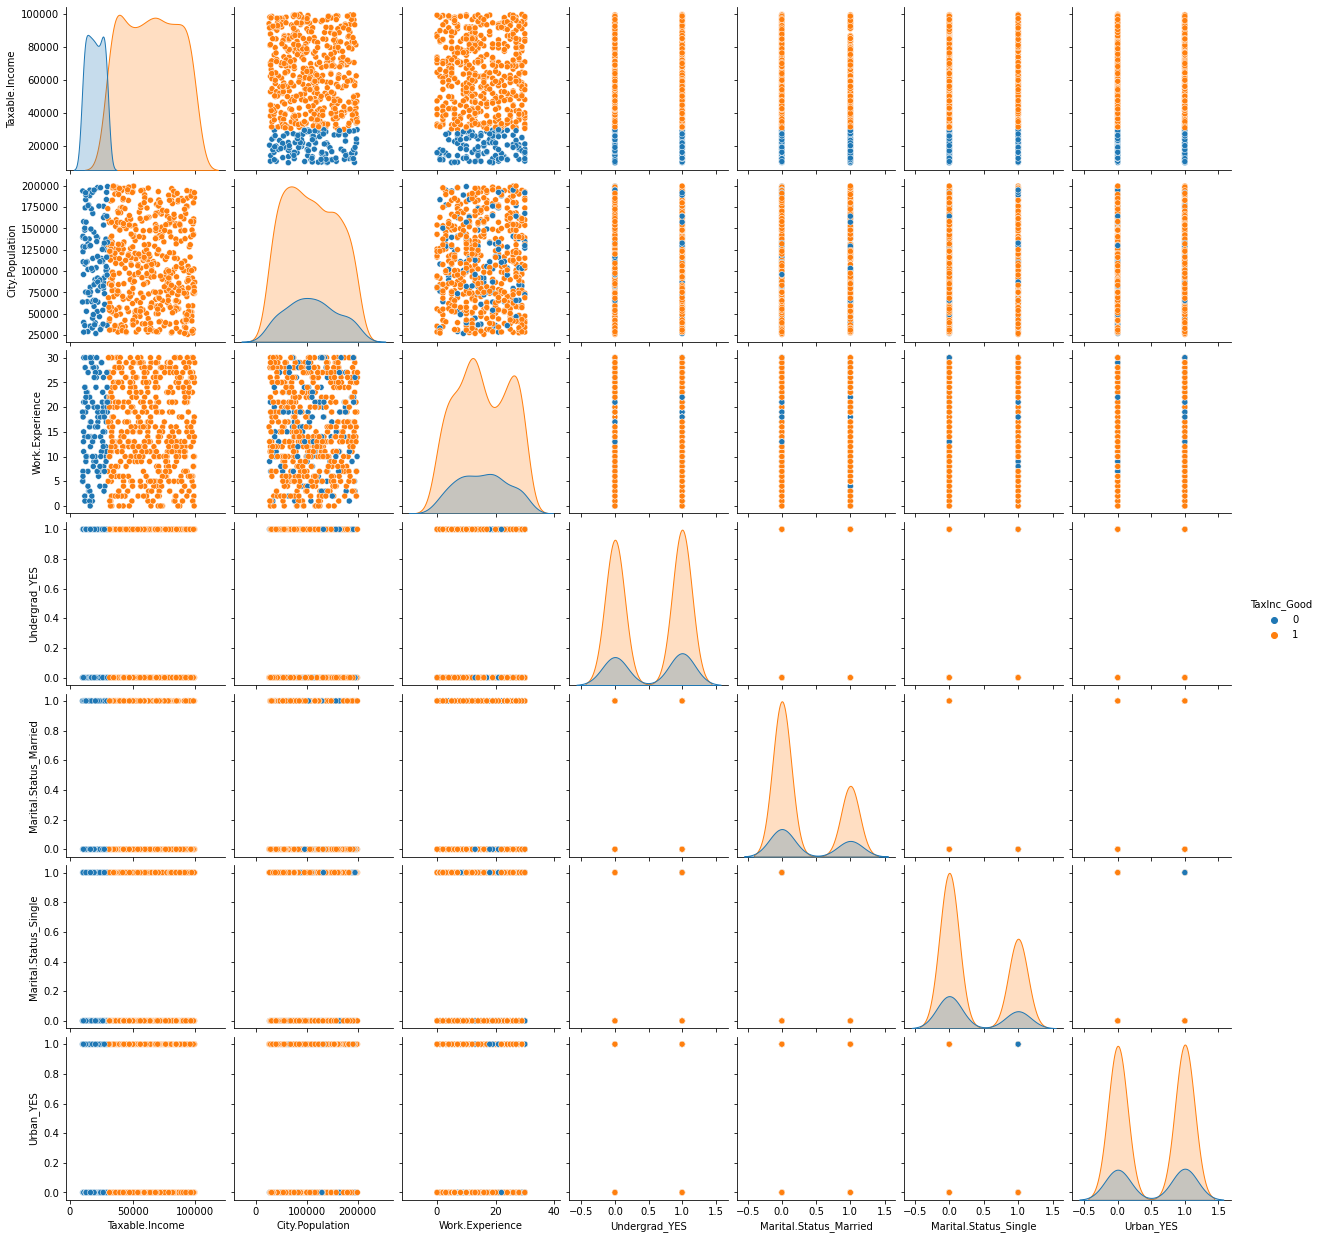

In [13]:
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')

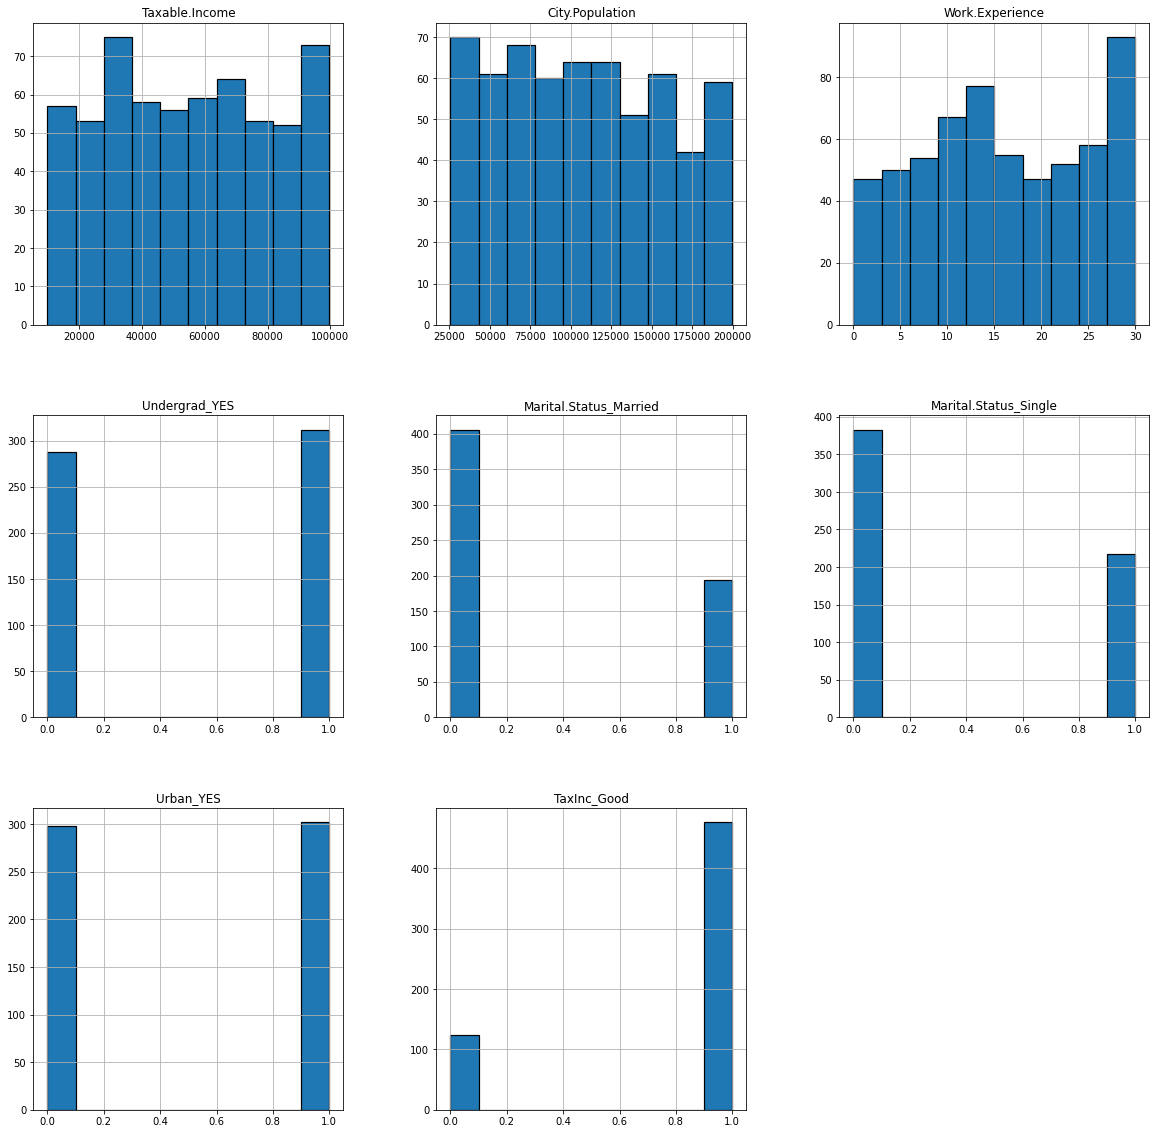

In [14]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<AxesSubplot:>

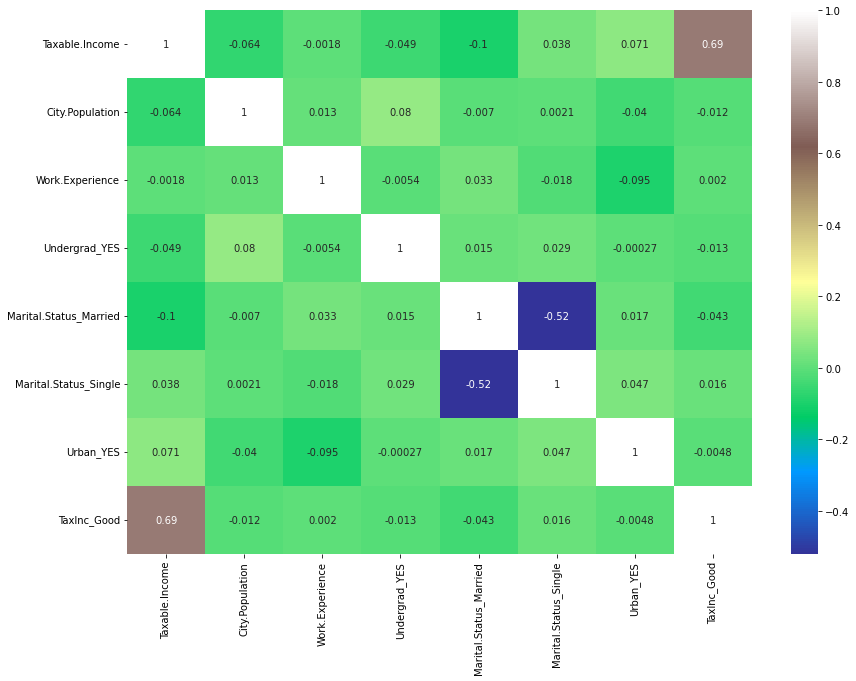

In [15]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='terrain')

In [13]:
# Normalization  
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
# Normalized data frame 
df_norm = norm_func(df.iloc[:,1:])
df_norm

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


In [15]:
# Declaring X and Y
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=40)

In [17]:
# Converting the Taxable income variable to bucketing
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [18]:
# Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [19]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [20]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [21]:
# Splitting the data 
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [22]:
# Collecting the column names
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]

In [23]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [24]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(480, 5) (120, 5) (480,) (120,)


In [25]:
x_test

,population,experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
516,76337,18,1,0,1
288,174196,21,1,1,0
323,165175,13,1,1,0
478,65242,6,0,0,0
342,31097,7,1,1,0
...,...,...,...,...,...
465,116282,21,0,0,0
461,163901,6,0,0,1
19,126953,30,0,0,1
395,183094,5,1,0,1


# Random Forest Model building

In [26]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier (n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [27]:
model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=222721963),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1140763694),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2144993646),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=88757408),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=475113765),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=804165709),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1305059026),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1706227281),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
           

In [28]:
model.classes_

array([0, 1], dtype=uint8)

In [29]:
model.n_features_

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


5

In [30]:
model.n_classes_

2

In [31]:
model.n_outputs_

1

In [32]:
model.oob_score_

0.5333333333333333

In [33]:
# Predictions on train data
prediction = model.predict(x_train)

In [34]:
prediction

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,

In [35]:
# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [36]:
accuracy

0.9895833333333334

In [37]:
np.mean(prediction == y_train)

0.9895833333333334

In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [39]:
confusion

array([[235,   3],
       [  2, 240]], dtype=int64)

In [40]:
# Prediction on test data
pred_test = model.predict(x_test)

In [41]:
pred_test

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

In [42]:
# Accuracy
acc_test =accuracy_score(y_test,pred_test)

In [43]:
acc_test

0.5166666666666667

# K-Fold cross Validation

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
results=cross_val_score(model,features,labels,cv=kfold)
print(results.mean())

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably me

0.5399999999999999


# Bagging

In [45]:
modelb1=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=modelb1)
results=cross_val_score(model,features,labels,cv=kfold)
print(results.mean())

0.5166666666666666


# Problem on Company data

In [47]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [115]:
# Importing the data
df1 = pd.read_csv('E:\\download\\Company_Data.csv')
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [116]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [117]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [118]:
df1['Sales_New'] = pd.cut(x=df1['Sales'], bins=[0, 10, 12, 25],
                     labels=['Low', 'Medium', 'High'])
                             

In [119]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_New
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Low
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Medium
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [120]:
# Remove Sales column because i have created categorical sales column
df2 = df1.drop(['Sales'], axis=1)
df2

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_New
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Low
1,111,48,16,260,83,Good,65,10,Yes,Yes,Medium
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CompPrice    400 non-null    int64   
 1   Income       400 non-null    int64   
 2   Advertising  400 non-null    int64   
 3   Population   400 non-null    int64   
 4   Price        400 non-null    int64   
 5   ShelveLoc    400 non-null    object  
 6   Age          400 non-null    int64   
 7   Education    400 non-null    int64   
 8   Urban        400 non-null    object  
 9   US           400 non-null    object  
 10  Sales_New    399 non-null    category
dtypes: category(1), int64(7), object(3)
memory usage: 31.9+ KB


In [72]:
df2.dropna(axis=0, inplace=True)

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CompPrice    399 non-null    int64   
 1   Income       399 non-null    int64   
 2   Advertising  399 non-null    int64   
 3   Population   399 non-null    int64   
 4   Price        399 non-null    int64   
 5   ShelveLoc    399 non-null    object  
 6   Age          399 non-null    int64   
 7   Education    399 non-null    int64   
 8   Urban        399 non-null    object  
 9   US           399 non-null    object  
 10  Sales_New    399 non-null    category
dtypes: category(1), int64(7), object(3)
memory usage: 34.8+ KB


In [121]:
df2

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_New
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Low
1,111,48,16,260,83,Good,65,10,Yes,Yes,Medium
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [75]:
df2.shape

(399, 11)

In [76]:
df2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 399, dtype: bool

In [77]:
df2[df2.duplicated()].shape

(0, 11)

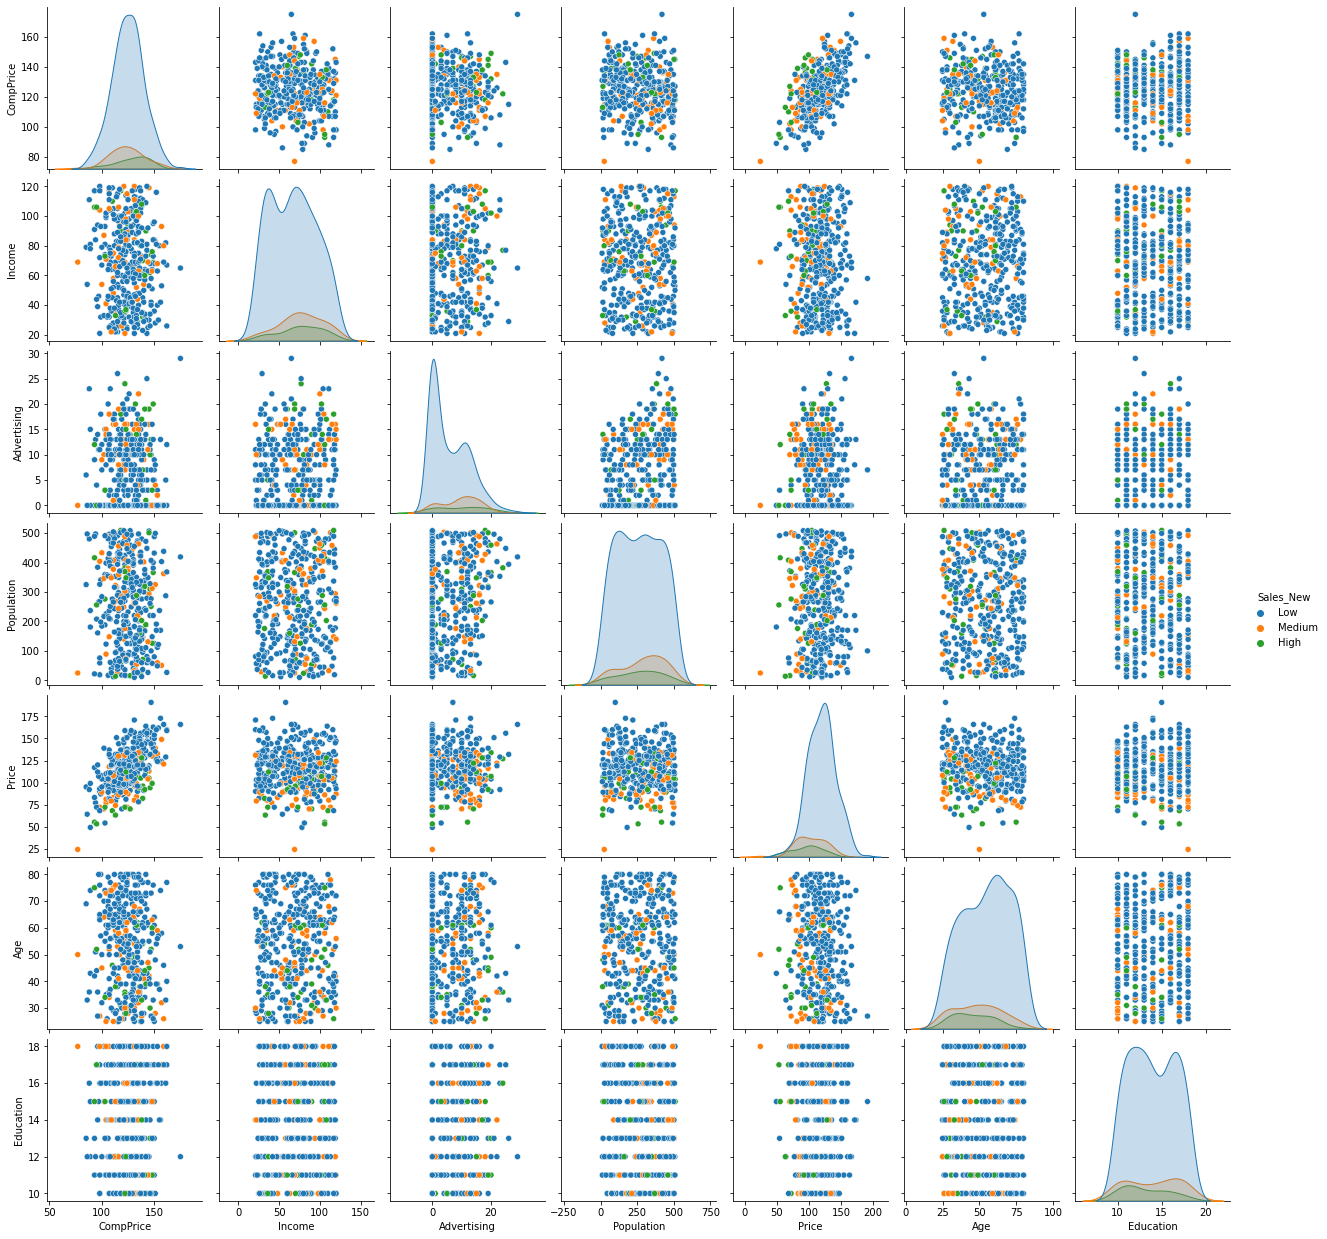

In [122]:
# Visualisation of the attributed
import seaborn as sns
sns.pairplot(data=df2, hue = 'Sales_New')

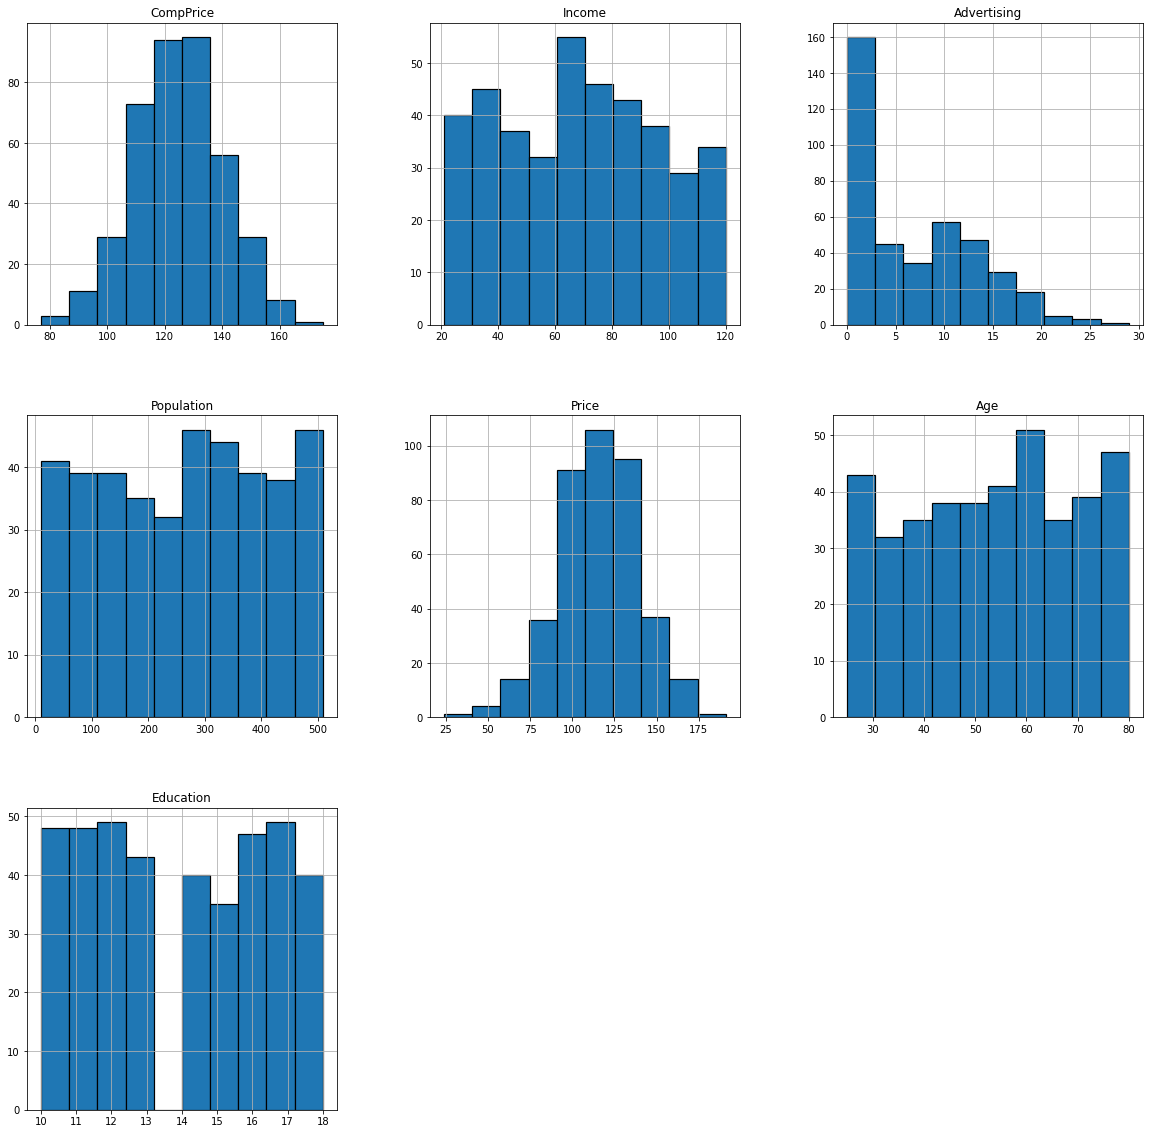

In [79]:
# Visulazing the distibution of the data for every feature
df2.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<AxesSubplot:>

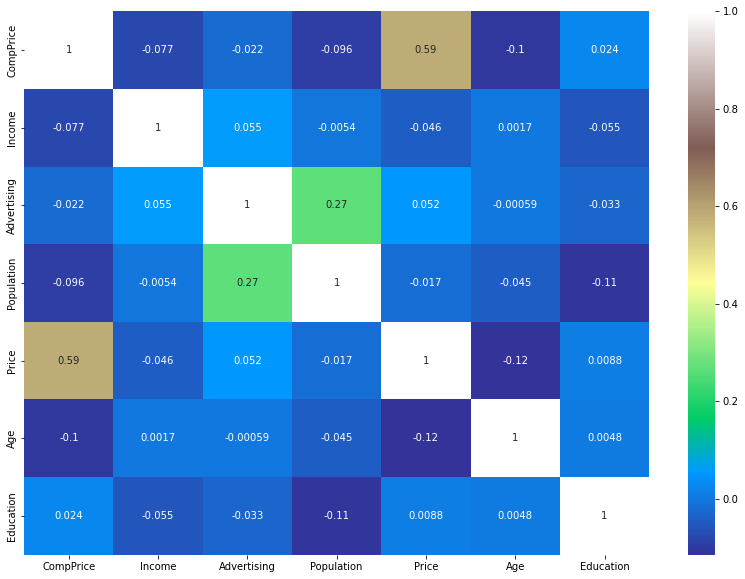

In [80]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(df2.corr(),annot=True,cmap='terrain')

In [81]:
# Creating dummy variables 
data = pd.get_dummies(df2,columns=['Urban','US'], drop_first=True)
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Sales_New,Urban_Yes,US_Yes
0,138,73,11,276,120,Bad,42,17,Low,1,1
1,111,48,16,260,83,Good,65,10,Medium,1,1
2,113,35,10,269,80,Medium,59,12,Medium,1,1
3,117,100,4,466,97,Medium,55,14,Low,1,1
4,141,64,3,340,128,Bad,38,13,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,High,1,1
396,139,23,3,37,120,Medium,55,11,Low,0,1
397,162,26,12,368,159,Medium,40,18,Low,1,1
398,100,79,7,284,95,Bad,50,12,Low,1,1


In [82]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
data['Sales_New']=data['Sales_New'].map({'High':1,'Medium':2,'Low':3})
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Sales_New,Urban_Yes,US_Yes
0,138,73,11,276,120,Bad,42,17,3,1,1
1,111,48,16,260,83,Good,65,10,2,1,1
2,113,35,10,269,80,Medium,59,12,2,1,1
3,117,100,4,466,97,Medium,55,14,3,1,1
4,141,64,3,340,128,Bad,38,13,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,1,1,1
396,139,23,3,37,120,Medium,55,11,3,0,1
397,162,26,12,368,159,Medium,40,18,3,1,1
398,100,79,7,284,95,Bad,50,12,3,1,1


In [83]:
data.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Sales_New      0
Urban_Yes      0
US_Yes         0
dtype: int64

In [84]:
x=data.iloc[:,0:5]
y=data['Sales_New']
print(x)
print(y)

     CompPrice  Income  Advertising  Population  Price
0          138      73           11         276    120
1          111      48           16         260     83
2          113      35           10         269     80
3          117     100            4         466     97
4          141      64            3         340    128
..         ...     ...          ...         ...    ...
395        138     108           17         203    128
396        139      23            3          37    120
397        162      26           12         368    159
398        100      79            7         284     95
399        134      37            0          27    120

[399 rows x 5 columns]
0      3
1      2
2      2
3      3
4      3
      ..
395    1
396    3
397    3
398    3
399    3
Name: Sales_New, Length: 399, dtype: category
Categories (3, int64): [3 < 2 < 1]


In [85]:
data['Sales_New'].unique()

[3, 2, 1]
Categories (3, int64): [3 < 2 < 1]

In [86]:
data.Sales_New.value_counts()

3    321
2     51
1     27
Name: Sales_New, dtype: int64

In [87]:
colnames = list(data.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Sales_New',
 'Urban_Yes',
 'US_Yes']

In [88]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [89]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(319, 5) (80, 5) (319,) (80,)


# Random Forest model building

In [90]:
from sklearn.ensemble import RandomForestClassifier 
model1 = RandomForestClassifier (n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model1.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [92]:
model1.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=157227883),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1907875846),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2065065436),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2146688466),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1134863078),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=98687261),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=434884443),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1495453992),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
          

In [93]:
model1.classes_

array([1, 2, 3], dtype=int64)

In [95]:
model1.n_classes_

3

In [96]:
model1.n_features_

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


5

In [97]:
model1.n_outputs_

1

In [98]:
model1.oob_score_

0.7617554858934169

In [100]:
# Predictions on train data
prediction = model1.predict(x_train)

In [101]:
prediction

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 1, 1, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 2, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 1, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 1, 3,
       3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,

In [102]:
# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [103]:
accuracy

0.9937304075235109

In [104]:
np.mean(prediction == y_train)

0.9937304075235109

In [105]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [106]:
confusion

array([[ 22,   1,   0],
       [  0,  41,   1],
       [  0,   0, 254]], dtype=int64)

In [107]:
# Prediction on test data
pred_test = model1.predict(x_test)

In [108]:
pred_test

array([3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [109]:
# Accuracy
acc_test =accuracy_score(y_test,pred_test)

In [110]:
acc_test

0.825

# K-Fold cross Validation

In [111]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
results=cross_val_score(model1,x,y,cv=kfold)
print(results.mean())

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


0.8020512820512821


# Bagging

In [112]:
modelb1=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=modelb1)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.8019871794871796
